
# **O QUE JÁ FAZ:**
-RAG funcionando lindamente
-Geração de Respostas
-Busca na Web
-Citações corretas!

# **O que Falta:**
- Cálculo de Métricas;
- Formatação com o nome dos arquivos entregáveis (talvez pegar essas células e usar no vscode);
- Fazer a interface mais Simples: Interface inicial dizendo que tiramos dúvidas sobre TDAH + Espaço para o usuário fazer Perguntas +Espaço da Resposta.
- Fazer o Read.ME

**PDF USADO: **
https://drive.google.com/file/d/125iNbSXhMir59ebmqRUihftKjTVpTby-/view?usp=sharing

In [2]:
!pip install -U -q langgraph langchain langchain-community langchain-google-genai pypdf langchain-huggingface sentence-transformers faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.4/483.4 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447


- Google Gemini API Key: https://aistudio.google.com/app/apikey?hl=pt-br

In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")

GOOGLE_API_KEY: ··········


In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

Upload do PDF

In [5]:
from google.colab import files
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

Saving livro tdah.pdf to livro tdah.pdf


In [6]:
from langchain import hub
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

loader = PyPDFLoader('livro tdah.pdf')
docs = loader.load()


In [7]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(all_splits, embedding=embeddings)

/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or
/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that auth

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
!pip install -U ddgs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 127.6 MB/s eta 0:00:00


In [37]:
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_community.tools import DuckDuckGoSearchResults
from typing import List, TypedDict
from langchain.schema import Document
import unicodedata

web_search = DuckDuckGoSearchResults(num_results=3)
prompt = hub.pull("rlm/rag-prompt")

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str
    used_web: bool
    is_off_topic: bool

def normalize(text: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                   if unicodedata.category(c) != 'Mn').lower()

def retrieve(state: State):
    topic_keywords = [
        "TDAH", "ADHD", "déficit de atenção", "hiperatividade",
        "transtorno atenção", "neurodesenvolvimento", "psiquiatria",
        "mental health", "saúde mental", "neurodivergência",
        "tdah", "ritalina", "venvanse", "diagnóstico",
    ]

    question_norm = normalize(state["question"])
    is_about_tdah = any(normalize(keyword) in question_norm for keyword in topic_keywords)

    if not is_about_tdah:
        return {"context": [], "used_web": False, "is_off_topic": True}

    retrieved_docs = vectorstore.similarity_search_with_score(state["question"], k=3)

    relevant_docs = [doc for doc, score in retrieved_docs if score > 0.7]

    if relevant_docs:
        return {"context": relevant_docs, "used_web": False, "is_off_topic": False}
    else:
        web_results = web_search.run(state["question"])

        web_docs = []
        for i, res in enumerate(web_results.split("\n")):
            if res.strip():
                parts = res.split(" - ")
                content = res
                metadata = {"source": "web", "search_result": f"result_{i+1}"}

                if len(parts) >= 2:
                    content = parts[0]
                    metadata["url"] = parts[-1]

                web_docs.append(Document(page_content=content, metadata=metadata))

        return {"context": web_docs, "used_web": True, "is_off_topic": False}

def generate(state: State):
    if state.get("is_off_topic", False):
        return {"answer": "Desculpe, só consigo responder perguntas relacionadas a TDAH e saúde mental."}

    context_with_sources = []
    for i, doc in enumerate(state["context"]):
        source_info = ""
        if "url" in doc.metadata:
            source_info = f" [Fonte: {doc.metadata['url']}]"
        elif "source" in doc.metadata and doc.metadata["source"] == "web":
            source_info = f" [Fonte: Resultado de busca {i+1}]"
        elif "page" in doc.metadata:
            source_info = f" [Fonte: PDF p.{doc.metadata.get('page', 'N/A')}]"

        context_with_sources.append(f"{doc.page_content}{source_info}")

    docs_content = "\n\n".join(context_with_sources)
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

def self_check(state: State):
    if state.get("is_off_topic", False):
        return state

    answer = state["answer"]

    has_sources = any(keyword in answer for keyword in
                     ["Fonte:", "http://", "https://", "p.", "página", "fonte:", "source:"])

    if has_sources:
        return state
    else:
        search_query = f"{state['question']} site:.edu OR site:.gov OR site:.org OR site:.research OR site:.scielo.br"
        web_results = web_search.run(search_query)

        web_docs = []
        for i, res in enumerate(web_results.split("\n")):
            if res.strip():
                parts = res.split(" - ")
                content = res
                metadata = {"source": "web_verification", "result_type": "source_validation"}

                if len(parts) >= 2:
                    content = f"Informação de validação: {parts[0]}"
                    metadata["validation_url"] = parts[-1]
                    metadata["source_number"] = i + 1

                web_docs.append(Document(page_content=content, metadata=metadata))

        verification_context = "\n\n".join(
            f"{doc.page_content} [Fonte de verificação: {doc.metadata.get('validation_url', 'Busca web')}]"
            for doc in web_docs
        )

        source_prompt = """
        Você forneceu uma resposta sobre TDAH, mas precisa incluir fontes confiáveis.
        Use as informações abaixo para adicionar referências à sua resposta.

        Pergunta original: {question}

        Sua resposta inicial: {initial_answer}

        Informações para citação:
        {context}

        Por favor, revise sua resposta incluindo fontes confiáveis (URLs quando disponível).
        Use formato: [Fonte: URL ou descrição da fonte]
        """

        messages = [
            SystemMessage(content="Você é um assistente especializado em TDAH que sempre cita fontes confiáveis."),
            HumanMessage(content=source_prompt.format(
                question=state["question"],
                initial_answer=state["answer"],
                context=verification_context
            ))
        ]

        response = llm.invoke(messages)
        return {"answer": response.content, "context": state["context"] + web_docs}

graph_builder = StateGraph(State)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder.add_node("self_check", self_check)

graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_edge("generate", "self_check")
graph = graph_builder.compile()



In [16]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


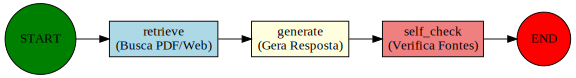

In [17]:
from IPython.display import Image, display
import tempfile
import os
import graphviz

dot = graphviz.Digraph()
dot.attr(rankdir='LR', size='8,5')

dot.node('start', 'START', shape='circle', style='filled', fillcolor='green')
dot.node('retrieve', 'retrieve\n(Busca PDF/Web)', shape='box', style='filled', fillcolor='lightblue')
dot.node('generate', 'generate\n(Gera Resposta)', shape='box', style='filled', fillcolor='lightyellow')
dot.node('self_check', 'self_check\n(Verifica Fontes)', shape='box', style='filled', fillcolor='lightcoral')
dot.node('end', 'END', shape='circle', style='filled', fillcolor='red')

dot.edge('start', 'retrieve')
dot.edge('retrieve', 'generate')
dot.edge('generate', 'self_check')
dot.edge('self_check', 'end')

display(dot)

In [18]:
response = graph.invoke({"question": "Você poderia me ajudar dizendo o que é TDAH?"})
print(response["answer"])

TDAH (Transtorno do Déficit de Atenção com Hiperatividade) é um transtorno neurobiológico caracterizado pela ocorrência de hiperatividade, impulsividade e desatenção [Fonte: Scielo - Crianças com TDAH em Contato com a Natureza: https://www.scielo.br/j/edreal/a/xJd4QkXcqYnPt5RMLG8GdgG/].

Essas características podem levar a dificuldades subjacentes em atrasar a resposta ao ambiente, na motivação e no funcionamento executivo. Isso torna desafiador para os indivíduos ficarem quietos, seguirem instruções em várias etapas e pensarem antes de agir, resultando em sintomas e prejuízos, especialmente em ambientes como a sala de aula.


In [19]:
response = graph.invoke({"question": "Quais os principais sintomas do TDAH?"})
print(response["answer"])

Os principais sintomas do TDAH são desatenção e hiperatividade/impulsividade. Estes são considerados os desfechos centrais relacionados à condição [Fonte: Diagnóstico Mente, Características de pessoas com TDAH, https://www.diagnostico-mente.org/blog/tdah/tdah-sintomas/].


In [20]:
response = graph.invoke({"question": "Qual o CID do TDAH? Quais medicações mais usadas?"})
print(response["answer"])

Com certeza! Como um assistente especializado em TDAH, é fundamental fornecer informações precisas e com fontes confiáveis.

Aqui está a sua resposta revisada, incluindo as referências solicitadas:

O Transtorno de Déficit de Atenção e Hiperatividade (TDAH) é classificado na Classificação Internacional de Doenças (CID). Na CID-10, os códigos para TDAH incluem F90.0 (Transtorno de atividade e atenção), F90.1 (Transtorno de conduta hipercinéticos), F90.2 (Outros transtornos hipercinéticos) e F90.9 (Transtorno hipercinético não especificado). Na CID-11, o código principal é 6A05 (Transtorno de Déficit de Atenção e Hiperatividade). O diagnóstico do TDAH é baseado em critérios estabelecidos por manuais como o DSM-5 (Manual Diagnóstico e Estatístico de Transtornos Mentais) [Fonte: Associação Brasileira do TDAH - https://tdah.org.br/entenda-o-tdah-nos-criterios-do-dsm-v/].

As medicações mais usadas para o TDAH são geralmente estimulantes, como o metilfenidato (por exemplo, Ritalina, Concerta

In [21]:
#Aqui a gente consegue ver que o self check tá funcioanando bem direitinho

response = graph.invoke({"question": "De que ano é a cartilha do TDAH??"})
print(response["answer"])

Não há informações no contexto fornecido sobre o ano da cartilha do TDAH. O texto discute intervenções escolares, monitoramento e cuidados para pessoas com TDAH, mas não menciona a data de publicação de uma cartilha.

As informações de validação fornecidas, embora sejam fontes confiáveis sobre o TDAH em geral, abordando temas como diagnóstico, impacto em relacionamentos e desmistificação de preconceitos, não contêm detalhes sobre uma cartilha específica ou seu ano de publicação.

[Fonte: Mayo Clinic, https://www.mayoclinic.org/es/diseases-conditions/adhd/diagnosis-treatment/drc-20350895]
[Fonte: Doutor Bruno, https://doutorbruno.org/2025/01/30/o-impacto-do-tdah-em-relacionamentos-como-construir-conexoes-saudaveis/]
[Fonte: Fundación PSF, https://fundacionpsf.org/tdah-desmontando-prejuicios-y-resaltando-fortalezas/]


In [22]:
# ehhehehheeh teste
response = graph.invoke({"question": "Quem é João Victor Cosme?"})
print(response["answer"])

Desculpe, só consigo responder perguntas relacionadas a TDAH e saúde mental.


In [26]:
response = graph.invoke({"question": "Como fazer macarrão?"})
print(response["answer"])

Desculpe, só consigo responder perguntas relacionadas a TDAH e saúde mental.


In [27]:
response = graph.invoke({"question": "tdah é mais comum em meninos ou meninas?"})
print(response["answer"])

Tradicionalmente, o Transtorno do Déficit de Atenção com Hiperatividade (TDAH) tem sido diagnosticado com mais frequência em meninos. No entanto, é importante notar que isso pode refletir um viés na pesquisa e no diagnóstico. Meninas frequentemente apresentam sintomas menos óbvios, o que pode levar a um subdiagnóstico nessa população [Fonte: Rhema Neuroeducação, https://rhemaneuroeducacao.com.br/blog/tdah-e-o-processo-de-aprendizagem/].


In [28]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

Com base nas informações fornecidas, não há detalhes específicos sobre qual profissional procurar inicialmente se você suspeitar que tem TDAH.

As informações disponíveis descrevem o TDAH como uma condição em que crianças e adultos podem apresentar dificuldades para terminar tarefas, problemas para se concentrar e seguir instruções [Fonte: https://pt.wikipedia.org/wiki/Transtorno_do_déficit_de_atenção_e_hiperatividade].

Embora o acompanhamento de pessoas com TDAH em tratamento necessite de um cuidado multidisciplinar, que pode incluir médico, psicólogo, fonoaudiólogo e educadores, essa abordagem se refere ao monitoramento de quem já está em tratamento, e não à avaliação inicial de uma suspeita.

Outras informações fornecidas abordam condições relacionadas, como o Transtorno do Espectro Autista (TEA), que pode apresentar sinais motores [Fonte: https://pt.wikipedia.org/wiki/Transtorno_do_espectro_autista], e o Transtorno do Desenvolvimento da Coordenação (TDC), que implica em déficits e

In [29]:
#Perguntas polarizadas
response = graph.invoke({"question": "Vacina causa tdah?"})
print(response["answer"])

Não, não há evidências científicas que comprovem que vacinas causam TDAH.

Alegações de que vacinas estariam ligadas a doenças crônicas, incluindo questões neurodesenvolvimentais (como o TDAH), foram verificadas e refutadas por fontes confiáveis [Fonte: Fact Check: Vaccine Studies | ParentData by Emily Oster, https://parentdata.org/fact-check-vaccine-studies/].

Organizações de saúde renomadas, como a Academia Americana de Pediatria (AAP) e o Centro de Controle e Prevenção de Doenças (CDC), publicam e recomendam calendários de imunização baseados em evidências para crianças e adolescentes, focando na prevenção de doenças infecciosas [Fonte: AAP Releases Its Own Evidence-Based Immunization Schedule, https://www.healthychildren.org/English/news/Pages/AAP-releases-its-own-evidence-based-immunization-schedule.aspx; Tdap (Tetanus, Diphtheria, Pertussis) Vaccine VIS | Vaccines ..., https://www.cdc.gov/vaccines/hcp/current-vis/tdap.html].


In [30]:
response = graph.invoke({"question": "Quem tem tdah tem disposição ao autismo?"})
print(response["answer"])

Não, ter TDAH não significa ter uma disposição ao autismo. TDAH (Transtorno do Déficit de Atenção com Hiperatividade) e TEA (Transtorno do Espectro do Autismo) são condições de neurodesenvolvimento distintas, embora possam coexistir.

O TDAH se caracteriza por dificuldades na atenção, hiperatividade e impulsividade. Por outro lado, o TEA se associa com desafios na comunicação social, padrões repetitivos de comportamento e uma sensibilidade sensorial particular [Fonte: https://proyectozebra.org/tdah-y-tea-como-apoyarlos-en-el-entorno-escolar-y-familiar/].

As informações disponíveis não indicam que ter TDAH implique uma disposição ou predisposição direta ao autismo. Embora seja possível que ambos os transtornos coexistam em um indivíduo, eles são diagnosticados separadamente com base em critérios específicos para cada condição.


In [31]:
response = graph.invoke({"question": "Tdah tem cura?"})
print(response["answer"])

O Transtorno de Déficit de Atenção e Hiperatividade (TDAH) é uma condição neurobiológica crônica e, atualmente, **não tem cura**.

No entanto, os sintomas do TDAH podem ser efetivamente gerenciados através de diversas abordagens terapêuticas, permitindo que os indivíduos funcionem com mais consistência e sucesso em suas vidas diárias. O tratamento geralmente envolve uma combinação de medicamentos e aconselhamento [Fonte: Harvard Health Publishing, "Are you losing concentration and focus? It could be adult ADHD", https://www.health.harvard.edu/mind-and-mood/are-you-losing-concentration-and-focus-it-could-be-adult-adhd].

Os medicamentos para TDAH podem reduzir a hiperatividade, o comportamento impulsivo e os problemas de atenção [Fonte: Harvard Health Publishing, "Are you losing concentration and focus? It could be adult ADHD", https://www.health.harvard.edu/mind-and-mood/are-you-losing-concentration-and-focus-it-could-be-adult-adhd]. É fundamental que a medicação seja combinada com aco

In [32]:
response = graph.invoke({"question": "Quantas pessoas com tdah existem no Brasil?"})
print(response["answer"])

O contexto não fornece o número exato de pessoas com TDAH no Brasil, mas sim as taxas de prevalência. A prevalência de TDAH no Brasil é de 7,6% em crianças e adolescentes (6-17 anos), 5,2% em indivíduos entre 18 e 44 anos e 6,1% em pessoas maiores de 44 anos.

Essas estatísticas são parte de um esforço contínuo para entender a saúde mental e as condições neurológicas no país, como o TDAH [Fonte: O impacto do TDAH em relacionamentos: Como construir conexões saudáveis..., https://doutorbruno.org/2025/01/30/o-impacto-do-tdah-em-relacionamentos-como-construir-conexoes-saudaveis/]. A coleta e análise de dados sobre a população com deficiência e transtornos mentais são cruciais para políticas públicas e pesquisas, sendo frequentemente abordadas por fontes confiáveis como a SciELO [Fonte: Trajetória da identificação das pessoas com deficiência no Brasil: uma..., https://www.scielosp.org/article/csc/2024.v29n11/e03932024/; SciELO Brasil [Fonte de verificação: Prevalência de transtorno mental c

In [35]:
response = graph.invoke({"question": "Qual é a idade mais comum para o diagnóstico?"})
print(response["answer"])

As informações fornecidas para citação não contêm dados sobre a idade mais comum para o diagnóstico de TDAH. Os trechos referem-se a Mieloma Múltiplo, Diabetes Tipo 2 e Cordoma.

Portanto, com base *exclusivamente nas informações fornecidas*, não é possível determinar a idade mais comum para o diagnóstico de TDAH.


In [38]:
response = graph.invoke({"question": "Como saber se eu tenho autismo?"})
print(response["answer"])

Desculpe, só consigo responder perguntas relacionadas a TDAH e saúde mental.


In [39]:
response = graph.invoke({"question": "Sofro com desatenção e vivo com muita energia. Será que tenho tdah?"})
print(response["answer"])

Os sintomas de desatenção e alta energia (hiperatividade) são características comuns do Transtorno do Déficit de Atenção com Hiperatividade (TDAH), um transtorno de neurodesenvolvimento que pode apresentar desatenção e hiperatividade/impulsividade.

No entanto, é importante notar que nem toda desatenção ou alta energia significa ter TDAH, pois muitos transtornos psiquiátricos compartilham sintomas, e um mesmo sintoma pode aparecer em diferentes condições [Fonte: Psiquiatra Giuliana, "Sou muito desatento, será que tenho TDAH ?", https://giulianapsiquiatra.com.br/como-saber-se-tenho-tdah/].

Por isso, apenas um profissional de saúde qualificado pode realizar um diagnóstico preciso. Se você se identifica com esses sinais, buscar ajuda de um profissional de saúde mental é fundamental, pois o diagnóstico e o tratamento adequados podem melhorar significativamente a qualidade de vida [Fonte: Psiquiatra Jaqueline Bifano, "Será que tenho TDAH ? Entenda como é feito o diagnóstico em...", https:/

In [40]:
response = graph.invoke({"question": "Tomei 2 comprimidos de 20mg de ritalina de uma vez, é perigoso?"})
print(response["answer"])

Tomar 2 comprimidos de 20mg de Ritalina de uma vez significa ingerir 40mg de metilfenidato. A Ritalina (cloridrato de metilfenidato) é um medicamento que deve ser usado sob estrita orientação médica, com a dosagem ajustada individualmente.

**É perigoso tomar 40mg de Ritalina de uma vez se não for a dose prescrita para você ou se você não estiver acostumado a essa dosagem.**

As recomendações de dosagem geralmente envolvem incrementos graduais de 5 a 10mg por dia, em intervalos semanais, de acordo com a resposta e tolerância do paciente. A dose máxima diária recomendada é de 60 mg, dividida em 2 a 3 doses [Fonte: Portal Insights, https://www.portalinsights.com.br/perguntas-frequentes/pode-tomar-2-ritalinas-de-10mg-de-uma-vez]. Ingerir 40mg de uma vez representa uma dose significativa e pode exceder a tolerância individual, especialmente se não houver um ajuste gradual.

Tomar uma dose mais alta do que a prescrita ou recomendada pode aumentar significativamente os efeitos do medicamento

In [ ]:
response = graph.invoke({"question": ""})
print(response["answer"])

In [ ]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

In [ ]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

In [ ]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

In [ ]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

In [ ]:
#Aqui ele confessa que o etxto base do RAG não contém essa informação, então parte pra busca na web.
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])